In [1]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)   #Adjusts the configuration of the plots we will create

#Read the Data
df=pd.read_csv(r'C:\Users\CORECOM\Desktop\movies.csv')

In [10]:
#Let's look at the data
df.head()

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
3718,Avatar,PG-13,Action,2009,"December 18, 2009",1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
5288,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
1783,Titanic,PG-13,Drama,1997,"December 19, 1997",1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
4716,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
5144,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [3]:
#Let's see if there is any missing data

for col in df.columns:
    missing_data=np.mean(df[col].isnull())
    print(f'{col}-{missing_data}%')

name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%


In [4]:
#Data types for our columns
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

In [9]:
#To remove duplicates
df.drop_duplicates()

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
3718,Avatar,PG-13,Action,2009,"December 18, 2009",1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
5288,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
1783,Titanic,PG-13,Drama,1997,"December 19, 1997",1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
4716,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
5144,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,Tanner Hall,R,Drama,2009,"January 15, 2015",3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
1367,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994",1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
2274,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001",43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
154,Parasite,R,Horror,1982,"March 12, 1982",2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


In [12]:
#Sorting By Gross
df.sort_values(['gross'],inplace=True,ascending=False)
df

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
3718,Avatar,PG-13,Action,2009,"December 18, 2009",1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
5288,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
1783,Titanic,PG-13,Drama,1997,"December 19, 1997",1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
4716,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
5144,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,Tanner Hall,R,Drama,2009,"January 15, 2015",3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
1367,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994",1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
2274,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001",43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
154,Parasite,R,Horror,1982,"March 12, 1982",2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


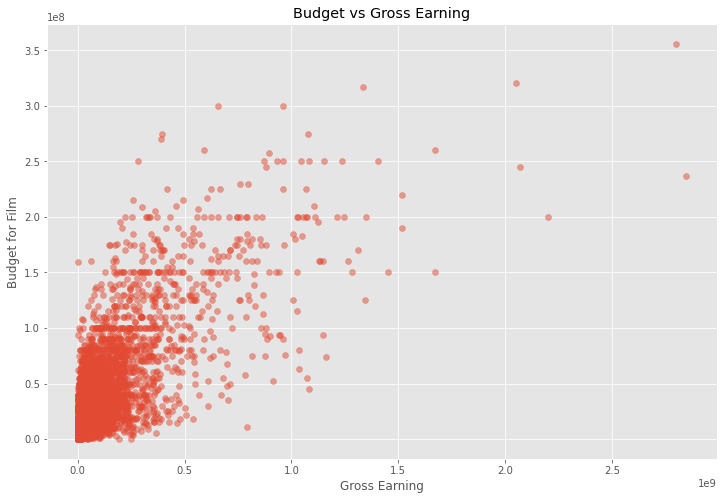

In [40]:
#Scatter Plot
plt.scatter(x=df['gross'],y=df['budget'],alpha=0.5)
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

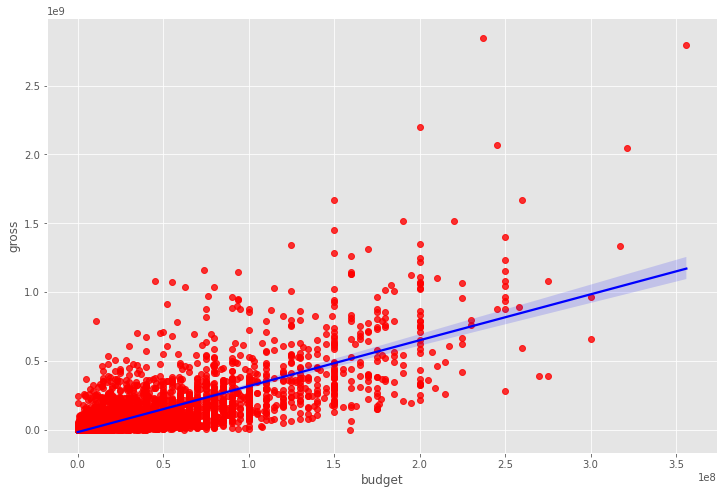

In [28]:
#Plot Budget vs Gross by seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={'color':'blue'})

In [33]:
#Let's look at correlation
df.corr(method='spearman')

,year,votes,budget,gross,runtime
year,1.000000,0.425279,0.311055,0.348700,0.095378
votes,0.425279,1.000000,0.491603,0.744457,0.300912
budget,0.311055,0.491603,1.000000,0.691660,0.330007
gross,0.348700,0.744457,0.691660,1.000000,0.257024
runtime,0.095378,0.300912,0.330007,0.257024,1.000000


In [34]:
df.corr(method ='kendall')

,year,votes,budget,gross,runtime
year,1.000000,0.294718,0.219634,0.237873,0.064803
votes,0.294718,1.000000,0.344894,0.552331,0.205562
budget,0.219634,0.344894,1.000000,0.510889,0.230709
gross,0.237873,0.552331,0.510889,1.000000,0.176728
runtime,0.064803,0.205562,0.230709,0.176728,1.000000


In [35]:
df.corr(method ='spearman')

,year,votes,budget,gross,runtime
year,1.000000,0.425279,0.311055,0.348700,0.095378
votes,0.425279,1.000000,0.491603,0.744457,0.300912
budget,0.311055,0.491603,1.000000,0.691660,0.330007
gross,0.348700,0.744457,0.691660,1.000000,0.257024
runtime,0.095378,0.300912,0.330007,0.257024,1.000000


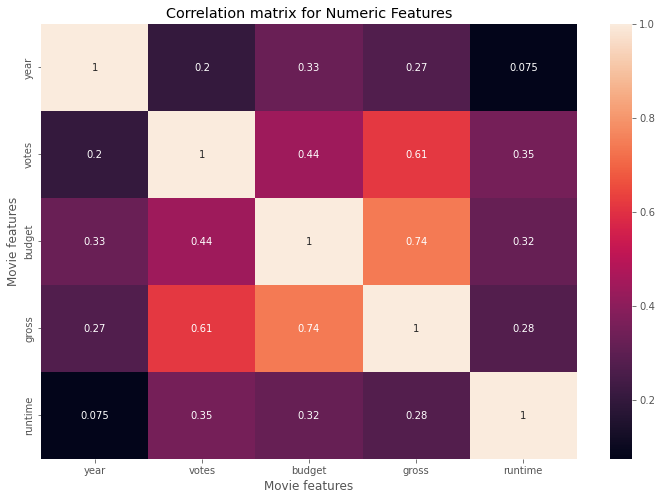

In [37]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [38]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39541625997
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8936980277
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [39]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
...                                             ...
erbp                                2013     587174
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
micro_scope                         2010    7099598
thefyzz                             2017   62198461

[2977 rows x 1 columns]

In [ ]:
#Numerize the non numeric data

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

In [45]:
df_numerized.corr(method='pearson')


,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029220,0.010840,0.025111,-0.005850,0.012264,0.014687,0.012449,-0.006846,-0.025192,0.022954,0.005278,0.021215,0.011083
rating,-0.029220,1.000000,0.148529,0.019746,0.017594,0.006652,0.014283,-0.002375,0.010629,0.009889,-0.203553,-0.181739,-0.092134,0.142450
genre,0.010840,0.148529,1.000000,-0.070039,0.022515,-0.134986,-0.009275,0.016506,0.003601,-0.008617,-0.368226,-0.243547,-0.071046,-0.059148
year,0.025111,0.019746,-0.070039,1.000000,-0.003361,0.204904,-0.037613,-0.024854,-0.032527,-0.067134,0.326740,0.273512,-0.015400,0.074849
released,-0.005850,0.017594,0.022515,-0.003361,1.000000,0.029166,0.002469,0.008702,0.015582,-0.016452,0.020821,0.009311,-0.001338,0.009291
votes,0.012264,0.006652,-0.134986,0.204904,0.029166,1.000000,-0.010430,-0.005376,-0.018099,0.041409,0.439077,0.614432,0.117717,0.352263
director,0.014687,0.014283,-0.009275,-0.037613,0.002469,-0.010430,1.000000,0.259625,0.035932,0.011458,-0.009708,-0.029676,-0.009179,0.018158
writer,0.012449,-0.002375,0.016506,-0.024854,0.008702,-0.005376,0.259625,1.000000,0.017183,0.022269,-0.039757,-0.036044,-0.004835,-0.017491
star,-0.006846,0.010629,0.003601,-0.032527,0.015582,-0.018099,0.035932,0.017183,1.000000,-0.011115,-0.022185,-0.000420,0.013621,0.009753
country,-0.025192,0.009889,-0.008617,-0.067134,-0.016452,0.041409,0.011458,0.022269,-0.011115,1.000000,0.052579,0.059910,0.047912,-0.035499


In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [ ]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df